In [1]:
%matplotlib notebook
#import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

# Data Manipulation

## Get Data from CSVs

In [2]:
#get the file paths for all of the data
fileWhite = "Resources/White_Not_Hispanic.csv"
fileLatino = "Resources/Hispanic_or_Latino.csv"
fileBlack = "Resources/Black_or_African_American.csv"
fileAsian = "Resources/Asian_Alone.csv"
fileAge = "Resources/Age_Data.csv"
fileHousePrices = "Resources/Metro_Zhvi_AllHomes.csv"

#read all the data into dataframes
white_df = pd.read_csv(fileWhite)
latino_df = pd.read_csv(fileLatino)
black_df = pd.read_csv(fileBlack)
asian_df = pd.read_csv(fileAsian)
age_data_df = pd.read_csv(fileAge)
house_price_df = pd.read_csv(fileHousePrices, encoding="ISO-8859-1")

## General Cleaning for Census Data

In [3]:
#get rid of the garbage header in the Census Bureau's files
new_header = white_df.iloc[0]
white_df = white_df[1:]
white_df.columns = new_header

new_header = latino_df.iloc[0]
latino_df = latino_df[1:]
latino_df.columns = new_header

new_header = black_df.iloc[0]
black_df = black_df[1:]
black_df.columns = new_header

new_header = asian_df.iloc[0]
asian_df = asian_df[1:]
asian_df.columns = new_header

new_header = age_data_df.iloc[0]
age_data_df = age_data_df[1:]
age_data_df.columns = new_header

In [4]:
#set the index to be by the cities
white_df = white_df.set_index("Geography")
latino_df = latino_df.set_index("Geography")
black_df = black_df.set_index("Geography")
asian_df = asian_df.set_index("Geography")
age_data_df = age_data_df.set_index("Geography")

## Clean the Race Demographics Data

In [5]:
#Narrow down the cities to the selected cities for the White Demographic
white_select_df = pd.DataFrame(white_df.loc[[
    "New York city, New York", 
    "Los Angeles city, California", 
    "Chicago city, Illinois", 
    "Seattle city, Washington", 
    "Cleveland city, Ohio", 
    "Philadelphia city, Pennsylvania", 
    "Miami Beach city, Florida", 
    "Atlanta city, Georgia", 
    "Dallas city, Texas", 
    "Phoenix city, Arizona"]])

In [6]:
#Narrow down the cities to the selected cities for the Latino/Hispanic Demographic
latino_select_df = pd.DataFrame(latino_df.loc[[
    "New York city, New York", 
    "Los Angeles city, California", 
    "Chicago city, Illinois", 
    "Seattle city, Washington", 
    "Cleveland city, Ohio", 
    "Philadelphia city, Pennsylvania", 
    "Miami Beach city, Florida", 
    "Atlanta city, Georgia", 
    "Dallas city, Texas", 
    "Phoenix city, Arizona"]])

In [7]:
#Narrow down the cities to the selected cities for the Black/African American Demographic
black_select_df = pd.DataFrame(black_df.loc[[
    "New York city, New York", 
    "Los Angeles city, California", 
    "Chicago city, Illinois", 
    "Seattle city, Washington", 
    "Cleveland city, Ohio", 
    "Philadelphia city, Pennsylvania", 
    "Fort Lauderdale city, Florida", 
    "Atlanta city, Georgia", 
    "Dallas city, Texas", 
    "Phoenix city, Arizona"]])

In [8]:
#Narrow down the cities to the selected cities for the Asian Demographic
asian_select_df = pd.DataFrame(asian_df.loc[[
    "New York city, New York", 
    "Los Angeles city, California", 
    "Chicago city, Illinois", 
    "Seattle city, Washington", 
    "Cleveland city, Ohio", 
    "Philadelphia city, Pennsylvania", 
    "Pembroke Pines city, Florida", 
    "Atlanta city, Georgia", 
    "Dallas city, Texas", 
    "Phoenix city, Arizona"]])

In [9]:
#Narrow down the cities to the selected cities for the Age Demographics
age_data_select_df = pd.DataFrame(age_data_df.loc[[
    "New York city, New York", 
    "Los Angeles city, California", 
    "Chicago city, Illinois", 
    "Seattle city, Washington", 
    "Cleveland city, Ohio", 
    "Philadelphia city, Pennsylvania", 
    "Pembroke Pines city, Florida", 
    "Atlanta city, Georgia", 
    "Dallas city, Texas", 
    "Phoenix city, Arizona"]])

In [10]:
#Pull out the Total and make the "Total" more reader friendly for the White Demographic
white_demographics_df = pd.DataFrame(white_select_df["Estimate; Total:"])
white_demographics_df = white_demographics_df.rename(
    columns = {"Estimate; Total:": "White Total"})

#Simplify and normalize Miami for the White Demographic
white_demographics_df = white_demographics_df.rename(
    index={
        "Miami Beach city, Florida": "Miami city, Florida"})

In [11]:
#Pull out the Total and make the "Total" more reader friendly for the Latino/Hispanic Demographic
latino_demographics_df = pd.DataFrame(latino_select_df["Estimate; Total:"])

latino_demographics_df = latino_demographics_df.rename(
    columns = {"Estimate; Total:": "Hispanic/Latino Total"})

#Simplify and normalize Miami for the Latino/Hispanic Demographic
latino_demographics_df = latino_demographics_df.rename(
    index={
        "Miami Beach city, Florida": "Miami city, Florida"})

In [12]:
#Pull out the Total and make the "Total" more reader friendly for the Black/African American Demographic
black_demographics_df = pd.DataFrame(black_select_df["Estimate; Total:"])

black_demographics_df = black_demographics_df.rename(
    columns = {"Estimate; Total:": "Black/African American Total"})

#Simplify and normalize Miami for the Black/African American Demographic
black_demographics_df = black_demographics_df.rename(
    index={
        "Fort Lauderdale city, Florida": "Miami city, Florida"})

In [13]:
#Pull out the Total and make the "Total" more reader friendly for the Asian Demographic
asian_demographics_df = pd.DataFrame(asian_select_df["Estimate; Total:"])

asian_demographics_df = asian_demographics_df.rename(
    columns = {"Estimate; Total:": "Asian Total"})

#Simplify and normalize Miami for the the Asian Demographic
asian_demographics_df = asian_demographics_df.rename(
    index={
        "Pembroke Pines city, Florida": "Miami city, Florida"})

In [14]:
#Combine the racial demographics data into one table
race_demographics_df = pd.merge(white_demographics_df.astype("int"), 
                            latino_demographics_df.astype("int"), 
                           how="inner", 
                           on="Geography")

race_demographics_df = pd.merge(race_demographics_df,  
                            black_demographics_df.astype("int"), 
                           how="inner", 
                           on="Geography")

race_demographics_df = pd.merge(race_demographics_df,
                            asian_demographics_df.astype("int"), 
                           how="inner", 
                           on="Geography")

In [15]:
#Normalize the city names for the racial demographics
race_demographics_df = race_demographics_df.rename({
    "New York city, New York": "New York, NY", 
    "Los Angeles city, California": "Los Angeles, CA",
    "Chicago city, Illinois": "Chicago, IL",
    "Seattle city, Washington": "Seattle, WA",
    "Cleveland city, Ohio": "Cleveland, OH",
    "Philadelphia city, Pennsylvania": "Philadelphia, PA",
    "Miami city, Florida": "Miami, FL",
    "Dallas city, Texas": "Dallas, TX",
    "Phoenix city, Arizona": "Phoenix, AZ",
    "Atlanta city, Georgia": "Atlanta, GA"})

In [16]:
#Normalize the index title to "City" for the demographics data
race_demographics_df = race_demographics_df.reset_index()
race_demographics_df = race_demographics_df.rename(columns= {"Geography": "City"})
race_demographics_df = race_demographics_df.set_index("City")

## Clean Housing Prices Data

In [17]:
#set the index to be by the cities
house_price_df = house_price_df.set_index("RegionName")

In [18]:
#Narrow down the cities to the selected cities for housing prices data
house_price_select_df = pd.DataFrame(house_price_df.loc[[
    "New York, NY", 
    "Los Angeles-Long Beach-Anaheim, CA", 
    "Chicago, IL", 
    "Seattle, WA", 
    "Cleveland, OH", 
    "Philadelphia, PA", 
    "Miami-Fort Lauderdale, FL", 
    "Atlanta, GA", 
    "Dallas-Fort Worth, TX", 
    "Phoenix, AZ"]])

In [19]:
#Select the year to match the year of the Census data and take the average of the prices for that year
housing_prices_select_2017_df = pd.DataFrame(house_price_select_df[[
    "2017-01", "2017-02", "2017-03", 
    "2017-04", "2017-05", "2017-06", 
    "2017-07", "2017-08", "2017-09", 
    "2017-10", "2017-11", "2017-12"]])

housing_prices_select_2017_df["Average House Prices, 2017"] = housing_prices_select_2017_df[[
    "2017-01", "2017-02", "2017-03", 
    "2017-04", "2017-05", "2017-06", 
    "2017-07", "2017-08", "2017-09", 
    "2017-10", "2017-11", "2017-12"]].mean(axis=1)

In [20]:
#Pull out the 2017housing prices into its own dataframe
housing_2017_df = pd.DataFrame(housing_prices_select_2017_df[["Average House Prices, 2017"]])

#Normalize the index title to "City" for the housing data
housing_2017_df = housing_2017_df.reset_index()
housing_2017_df = housing_2017_df.rename(columns={"RegionName": "City"})
housing_2017_df = housing_2017_df.set_index("City")

#Normalize the names of of strangely named cities
housing_2017_df = housing_2017_df.rename({
    "Los Angeles-Long Beach-Anaheim, CA": "Los Angeles, CA",
    "Miami-Fort Lauderdale, FL":"Miami, FL",
    "Dallas-Fort Worth, TX":"Dallas, TX"})

#Change the House Prices to int to remove the floating decimals
housing_2017_df = pd.DataFrame(housing_2017_df["Average House Prices, 2017"].astype("int"))

## Cleaning the Age Demographics Data

In [21]:
#Normalize the city names for the age demographics
age_demographics_select_df = age_data_select_df.rename({
    "New York city, New York": "New York, NY", 
    "Los Angeles city, California": "Los Angeles, CA",
    "Chicago city, Illinois": "Chicago, IL",
    "Seattle city, Washington": "Seattle, WA",
    "Cleveland city, Ohio": "Cleveland, OH",
    "Philadelphia city, Pennsylvania": "Philadelphia, PA",
    "Miami city, Florida": "Miami, FL",
    "Dallas city, Texas": "Dallas, TX",
    "Phoenix city, Arizona": "Phoenix, AZ",
    "Atlanta city, Georgia": "Atlanta, GA"})

In [22]:
##Normalize the index title to "City" for the age data
age_demographics_select_df = age_demographics_select_df.reset_index()
age_demographics_select_df = age_demographics_select_df.rename(columns= {"Geography": "City"})
age_demographics_select_df = age_demographics_select_df.set_index("City")

In [23]:
#Sum the Male and Female categories to get the ages, combined into 5 year categories and put them into a Data Frame
age_demographics_df = pd.DataFrame({})

age_to_sum_df = age_demographics_select_df[["Estimate; Male: - Under 5 years", 
                                            "Estimate; Female: - Under 5 years"]].astype("int")
age_demographics_df["Under 5 Years Old"] = age_to_sum_df.sum(axis=1)


age_to_sum_df = age_demographics_select_df[["Estimate; Male: - 5 to 9 years", 
                                            "Estimate; Female: - 5 to 9 years"]].astype("int")
age_demographics_df["5 to 9 Years Old"] = age_to_sum_df.sum(axis=1)


age_to_sum_df = age_demographics_select_df[["Estimate; Male: - 10 to 14 years", 
                                            "Estimate; Female: - 10 to 14 years"]].astype("int")
age_demographics_df["10 to 14 Years Old"] = age_to_sum_df.sum(axis=1)


age_to_sum_df = age_demographics_select_df[["Estimate; Male: - 15 to 17 years", 
                                            "Estimate; Female: - 15 to 17 years", 
                                            "Estimate; Male: - 18 and 19 years", 
                                            "Estimate; Female: - 18 and 19 years"]].astype("int")
age_demographics_df["15 to 19 Years Old"] = age_to_sum_df.sum(axis=1)


age_to_sum_df = age_demographics_select_df[["Estimate; Male: - 20 years", 
                                            "Estimate; Female: - 20 years",
                                            "Estimate; Male: - 21 years", 
                                            "Estimate; Female: - 21 years", 
                                            "Estimate; Male: - 22 to 24 years", 
                                            "Estimate; Female: - 22 to 24 years"]].astype("int")
age_demographics_df["20 to 24 Years Old"] = age_to_sum_df.sum(axis=1)


age_to_sum_df = age_demographics_select_df[["Estimate; Male: - 25 to 29 years", 
                                            "Estimate; Female: - 25 to 29 years"]].astype("int")
age_demographics_df["25 to 29 Years Old"] = age_to_sum_df.sum(axis=1)


age_to_sum_df = age_demographics_select_df[["Estimate; Male: - 30 to 34 years", 
                                            "Estimate; Female: - 30 to 34 years"]].astype("int")
age_demographics_df["30 to 34 Years Old"] = age_to_sum_df.sum(axis=1)


age_to_sum_df = age_demographics_select_df[["Estimate; Male: - 35 to 39 years", 
                                            "Estimate; Female: - 35 to 39 years"]].astype("int")
age_demographics_df["35 to 39 Years Old"] = age_to_sum_df.sum(axis=1)


age_to_sum_df = age_demographics_select_df[["Estimate; Male: - 40 to 44 years", 
                                            "Estimate; Female: - 40 to 44 years"]].astype("int")
age_demographics_df["40 to 44 Years Old"] = age_to_sum_df.sum(axis=1)


age_to_sum_df = age_demographics_select_df[["Estimate; Male: - 45 to 49 years", 
                                            "Estimate; Female: - 45 to 49 years"]].astype("int")
age_demographics_df["45 to 49 Years Old"] = age_to_sum_df.sum(axis=1)


age_to_sum_df = age_demographics_select_df[["Estimate; Male: - 50 to 54 years", 
                                            "Estimate; Female: - 50 to 54 years"]].astype("int")
age_demographics_df["50 to 54 Years Old"] = age_to_sum_df.sum(axis=1)


age_to_sum_df = age_demographics_select_df[["Estimate; Male: - 55 to 59 years", 
                                            "Estimate; Female: - 55 to 59 years"]].astype("int")
age_demographics_df["55 to 59 Years Old"] = age_to_sum_df.sum(axis=1)


age_to_sum_df = age_demographics_select_df[["Estimate; Male: - 60 and 61 years", 
                                            "Estimate; Female: - 60 and 61 years",
                                            "Estimate; Male: - 62 to 64 years", 
                                            "Estimate; Female: - 62 to 64 years"]].astype("int")
age_demographics_df["60 to 64 Years Old"] = age_to_sum_df.sum(axis=1)


age_to_sum_df = age_demographics_select_df[["Estimate; Male: - 65 and 66 years", 
                                            "Estimate; Female: - 65 and 66 years",
                                            "Estimate; Male: - 67 to 69 years", 
                                            "Estimate; Female: - 67 to 69 years"]].astype("int")
age_demographics_df["65 to 69 Years Old"] = age_to_sum_df.sum(axis=1)


age_to_sum_df = age_demographics_select_df[["Estimate; Male: - 70 to 74 years", 
                                            "Estimate; Female: - 70 to 74 years"]].astype("int")
age_demographics_df["70 to 74 Years Old"] = age_to_sum_df.sum(axis=1)


age_to_sum_df = age_demographics_select_df[["Estimate; Male: - 75 to 79 years", 
                                            "Estimate; Female: - 75 to 79 years"]].astype("int")
age_demographics_df["75 to 79 Years Old"] = age_to_sum_df.sum(axis=1)


age_to_sum_df = age_demographics_select_df[["Estimate; Male: - 80 to 84 years", 
                                            "Estimate; Female: - 80 to 84 years"]].astype("int")
age_demographics_df["80 to 84 Years Old"] = age_to_sum_df.sum(axis=1)


age_to_sum_df = age_demographics_select_df[["Estimate; Male: - 85 years and over", 
                                            "Estimate; Female: - 85 years and over"]].astype("int")
age_demographics_df["85 Years and Older"] = age_to_sum_df.sum(axis=1)

## Add Housing Price Data to the Data Frames

In [24]:
#Add a Housing Price Data column to the Race Demographics data frame
race_demographics_final_df = pd.merge(race_demographics_df,  
                            housing_2017_df, 
                           how="inner", 
                           on="City")

In [25]:
#Add a Housing Price Data column to the Age Demographics data frame
age_demographics_final_df = pd.merge(age_demographics_df,  
                            housing_2017_df, 
                           how="inner", 
                           on="City")

## Display the Data

In [26]:
race_demographics_final_df

,White Total,Hispanic/Latino Total,Black/African American Total,Asian Total,"Average House Prices, 2017"
City,,,,,
"New York, NY",2733369,2517429,2094132,1252589,403591
"Los Angeles, CA",1124411,1956978,362079,461936,605975
"Chicago, IL",893334,787978,809079,181505,209033
"Seattle, WA",464010,48209,49980,114680,443758
"Cleveland, OH",126714,47962,187759,9319,132141
"Philadelphia, PA",545580,234183,663708,115279,216525
"Miami, FL",36303,50493,59911,10827,254300
"Atlanta, GA",179296,20878,256888,19551,184533
"Dallas, TX",381559,561455,328114,49720,206708


In [27]:
age_demographics_final_df

,Under 5 Years Old,5 to 9 Years Old,10 to 14 Years Old,15 to 19 Years Old,20 to 24 Years Old,25 to 29 Years Old,30 to 34 Years Old,35 to 39 Years Old,40 to 44 Years Old,45 to 49 Years Old,50 to 54 Years Old,55 to 59 Years Old,60 to 64 Years Old,65 to 69 Years Old,70 to 74 Years Old,75 to 79 Years Old,80 to 84 Years Old,85 Years and Older,"Average House Prices, 2017"
City,,,,,,,,,,,,,,,,,,,
"New York, NY",552576,475122,482943,460028,575248,813161,738824,631893,547685,551487,548677,518681,490744,398028,296494,221087,151419,168601,403591
"Los Angeles, CA",229431,227111,228570,242989,304571,372285,341941,313098,260688,273580,255955,241977,212441,160956,121791,75020,63483,73855,605975
"Chicago, IL",172017,150373,155283,153896,205271,288032,254158,201327,171763,164748,161728,159607,145721,110327,84822,56312,43917,37160,209033
"Seattle, WA",36294,34715,27534,34302,53106,89524,78098,60541,47751,51480,41017,39533,39676,33564,22447,13086,9712,12384,443758
"Cleveland, OH",25131,24454,23584,24904,28355,32422,27306,25104,20356,22368,25374,29688,23573,17474,11344,9477,7084,7554,132141
"Philadelphia, PA",105638,94473,91638,97006,116255,163591,136382,105719,89366,91870,93689,91103,92417,69752,51727,35605,26793,27839,216525
"Atlanta, GA",26654,28905,21197,34102,46326,57242,43372,38320,28280,30720,29090,23347,24074,19428,12982,9496,6135,6629,184533
"Dallas, TX",102533,93376,91708,79376,105141,139091,118222,96961,86494,75262,73313,76940,61991,51212,31909,26035,15263,16276,206708
"Phoenix, AZ",120141,110710,127642,111794,116811,134739,120385,115899,106662,112554,95540,95310,83518,61279,45055,28331,18105,21610,237233


# Visualizations

In [28]:
#shroten names and change data to int
rdf_df = race_demographics_final_df
adf_df = age_demographics_final_df

In [29]:
x_axis = np.arange(len(rdf_df))
tick_locations = [value for value in x_axis]

<IPython.core.display.Javascript object>


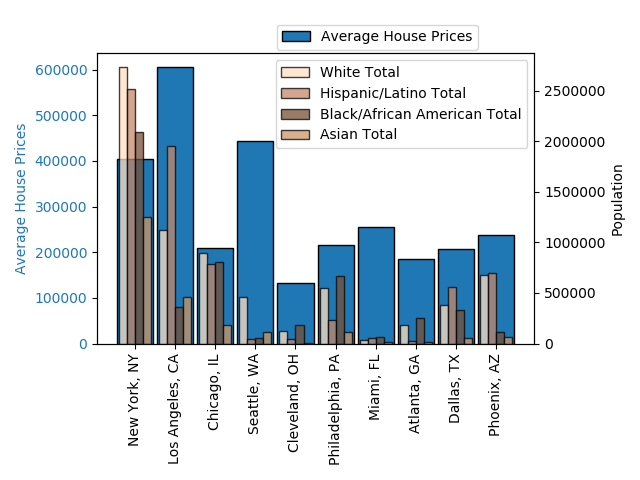

In [30]:
fig1, ax1 = plt.subplots()

ax1.bar(x_axis, rdf_df["Average House Prices, 2017"], width = .9, align="center", edgecolor="black")
ax1.set_ylabel("Average House Prices", color="#1F77B4")
ax1.tick_params(axis="y", labelcolor="#1F77B4")

ax1.legend(["Average House Prices"], bbox_to_anchor=(0.395, 1.02, 1., .102), loc=2)

plt.xticks(tick_locations, rdf_df.index, rotation=90)

ax2 = ax1.twinx()


ax2.bar(x_axis-.3, rdf_df["White Total"], color="#FFDFC4", width =.2, align="center", edgecolor="black", alpha=.75)
ax2.bar(x_axis-.1, rdf_df["Hispanic/Latino Total"], color="#C3886A", width =.2, align="center", edgecolor="black", alpha=.75)
ax2.bar(x_axis+.1, rdf_df["Black/African American Total"], color="#774F35", width =.2, align="center", edgecolor="black", alpha=.75)
ax2.bar(x_axis+.3, rdf_df["Asian Total"], color="#CC9667", width =.2, align="center", edgecolor="black", alpha=.75)
ax2.set_xlabel("City")
ax2.set_ylabel("Population", color="black")

ax2.legend(["White Total", "Hispanic/Latino Total", "Black/African American Total", "Asian Total"], loc=0)

fig1.tight_layout()
fig1.show()

In [31]:
fig1.savefig("Race_Demographics_vs_Housing_Prices")
fig1.show()

In [32]:
x_axis = np.arange(0, len(adf_df)*3, 3)
tick_locations = [value*3 for value in np.arange(len(adf_df))]

<IPython.core.display.Javascript object>


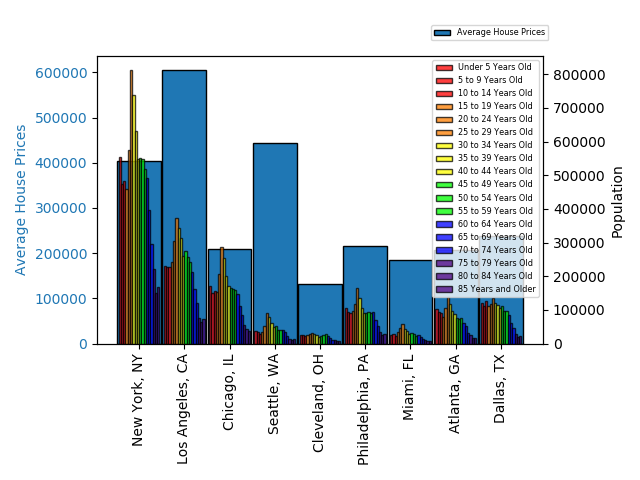

In [69]:
fig2, ax3 = plt.subplots()

ax3.bar(x_axis, adf_df["Average House Prices, 2017"], width = 2.9, align="center", edgecolor="black")
ax3.set_ylabel("Average House Prices", color="#1F77B4")
ax3.tick_params(axis="y", labelcolor="#1F77B4")

ax3.legend(["Average House Prices"], bbox_to_anchor=(0.74, 1.02, 1., .102), loc=2, fontsize="xx-small")

plt.xticks(tick_locations, rdf_df.index, rotation=90)

ax4 = ax3.twinx()

ax4.bar(x_axis-1.275, adf_df["Under 5 Years Old"], color="#FF0000", width =.15, align="center", edgecolor="black", alpha=.75)
ax4.bar(x_axis-1.125, adf_df["5 to 9 Years Old"], color="#FF0000", width =.15, align="center", edgecolor="black", alpha=.75)
ax4.bar(x_axis-0.975, adf_df["10 to 14 Years Old"], color="#FF0000", width =.15, align="center", edgecolor="black", alpha=.75)
ax4.bar(x_axis-0.825, adf_df["15 to 19 Years Old"], color="#FF7F00", width =.15, align="center", edgecolor="black", alpha=.75)
ax4.bar(x_axis-0.675, adf_df["20 to 24 Years Old"], color="#FF7F00", width =.15, align="center", edgecolor="black", alpha=.75)
ax4.bar(x_axis-0.525, adf_df["25 to 29 Years Old"], color="#FF7F00", width =.15, align="center", edgecolor="black", alpha=.75)
ax4.bar(x_axis-0.375, adf_df["30 to 34 Years Old"], color="#FFFF00", width =.15, align="center", edgecolor="black", alpha=.75)
ax4.bar(x_axis-0.225, adf_df["35 to 39 Years Old"], color="#FFFF00", width =.15, align="center", edgecolor="black", alpha=.75)
ax4.bar(x_axis-0.075, adf_df["40 to 44 Years Old"], color="#FFFF00", width =.15, align="center", edgecolor="black", alpha=.75)
ax4.bar(x_axis+0.075, adf_df["45 to 49 Years Old"], color="#00FF00", width =.15, align="center", edgecolor="black", alpha=.75)
ax4.bar(x_axis+0.225, adf_df["50 to 54 Years Old"], color="#00FF00", width =.15, align="center", edgecolor="black", alpha=.75)
ax4.bar(x_axis+0.375, adf_df["55 to 59 Years Old"], color="#00FF00", width =.15, align="center", edgecolor="black", alpha=.75)
ax4.bar(x_axis+0.525, adf_df["60 to 64 Years Old"], color="#0000FF", width =.15, align="center", edgecolor="black", alpha=.75)
ax4.bar(x_axis+0.675, adf_df["65 to 69 Years Old"], color="#0000FF", width =.15, align="center", edgecolor="black", alpha=.75)
ax4.bar(x_axis+0.825, adf_df["70 to 74 Years Old"], color="#0000FF", width =.15, align="center", edgecolor="black", alpha=.75)
ax4.bar(x_axis+0.975, adf_df["75 to 79 Years Old"], color="#4B0082", width =.15, align="center", edgecolor="black", alpha=.75)
ax4.bar(x_axis+1.125, adf_df["80 to 84 Years Old"], color="#4B0082", width =.15, align="center", edgecolor="black", alpha=.75)
ax4.bar(x_axis+1.275, adf_df["85 Years and Older"], color="#4B0082", width =.15, align="center", edgecolor="black", alpha=.75)

ax4.set_xlabel("City")
ax4.set_ylabel("Population", color="black")

ax4.legend(list(adf_df.columns), fontsize="xx-small", loc=0)

fig2.tight_layout()
fig2.show()

In [70]:
fig2.savefig("Age_Demographics_vs_Housing_Prices")
fig2.show()